https://github.com/mdipietro09/DataScience_ArtificialIntelligence_Utils/blob/master/machine_learning/example_route_optimization.ipynb


https://towardsdatascience.com/modern-route-optimization-with-python-fea87d34288b

#### Importing dependent libararies

In [2]:
import warnings
warnings.filterwarnings("ignore")

## for data
import pandas as pd  #1.1.5
import numpy as np  #1.21.0
from tqdm import tqdm

## for plotting
import matplotlib.pyplot as plt  #3.3.2
import seaborn as sns  #0.11.1
import folium  #0.14.0
from folium import plugins
import plotly.express as px  #5.1.0

## for simple routing
import osmnx as ox  #1.2.2
import networkx as nx  #3.0

## for advanced routing 
from ortools.constraint_solver import pywrapcp  #9.6
from ortools.constraint_solver import routing_enums_pb2

In [18]:
data = pd.read_csv('data_stores.csv')
print(data.City.values.tolist())

['Andorra la Vella', 'Ajman', 'Ajman', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Al Ain', 'Al Ain', 'Al Ain', 'Al Ain', 'Al Ain', 'Al Ain', 'Al Ain', 'Al Ain', 'Abu Dhabi', 'Abu Dhabi', 'Abu Dhabi', 'Al Barsha', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Du

In [24]:
city = "Abu Dhabi"
df = pd.read_csv('data_stores.csv')
df = df[df["City"]==city][["City","Street Address","Latitude","Longitude"]].reset_index(drop=True)
df = df.reset_index().rename(columns={"index":"id","Latitude":"y","Longitude":"x"})

print("Total:" , len(df))
df.head()

Total: 43


,id,City,Street Address,y,x
0,0,Abu Dhabi,Al Salam Street,24.48,54.38
1,1,Abu Dhabi,"Khaldiya Area, Abu Dhabi Island",24.51,54.54
2,2,Abu Dhabi,"Dalma Mall, Mussafah",24.40,54.49
3,3,Abu Dhabi,"Dalma Mall, Mussafah",24.40,54.49
4,4,Abu Dhabi,Yas Island,24.46,54.61


In [22]:
i = 0
df["base"] = df["id"].apply(lambda x:1 if x==i else 0)
start = df[df["base"] == 1][["y","x"]].values[0]
print("start = ",start)
df.head()

start =  [24.48 54.38]


,id,City,Street Address,y,x,base
0,0,Abu Dhabi,Al Salam Street,24.48,54.38,1
1,1,Abu Dhabi,"Khaldiya Area, Abu Dhabi Island",24.51,54.54,0
2,2,Abu Dhabi,"Dalma Mall, Mussafah",24.40,54.49,0
3,3,Abu Dhabi,"Dalma Mall, Mussafah",24.40,54.49,0
4,4,Abu Dhabi,Yas Island,24.46,54.61,0


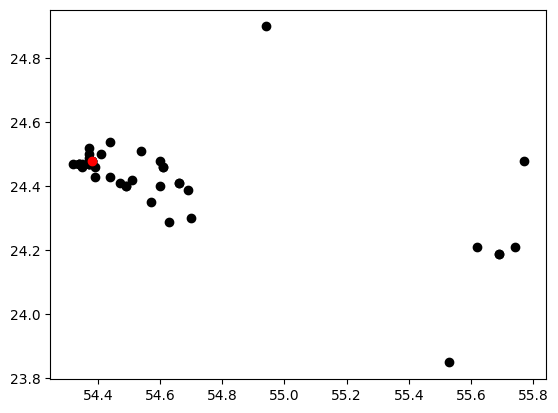

In [23]:
# pointing start point 
plt.scatter(y=df["y"], x = df["x"], color = "black")
plt.scatter(y = start[0], x=start[1], color = "red")
plt.show()

In [ ]:
# Creates the map

def plot_map(df, y,x,start, zoom = 12, title = "cartodbpositron", popup = None, size = None, legent)